In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/amro6/Downloads/archive (21)/advertising.csv")

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# Separate features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Initialize the model and feature selector
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3) 

# Fit RFE
rfe.fit(X, y)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['TV', 'Radio', 'Newspaper']


In [13]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


In [14]:
coefficients = model.coef_
intercept = model.intercept_

# Print the intercept and coefficients
print("Intercept:", intercept)
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ':', coef)
# Adding a constant to the model (statsmodels)
X = sm.add_constant(X)

# detailed summary
model_stats = sm.OLS(y, X).fit()
print(model_stats.summary())

Intercept: 4.71412640221414

Model Coefficients:
const : 0.0
TV : 0.054509270837219716
Radio : 0.1009453623929558
Newspaper : 0.004336646822034031
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        08:14:25   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

## From the above coefficients, it appears that Radio advertising has the most significant effect on Sales, followed by TV, and then Newspaper.

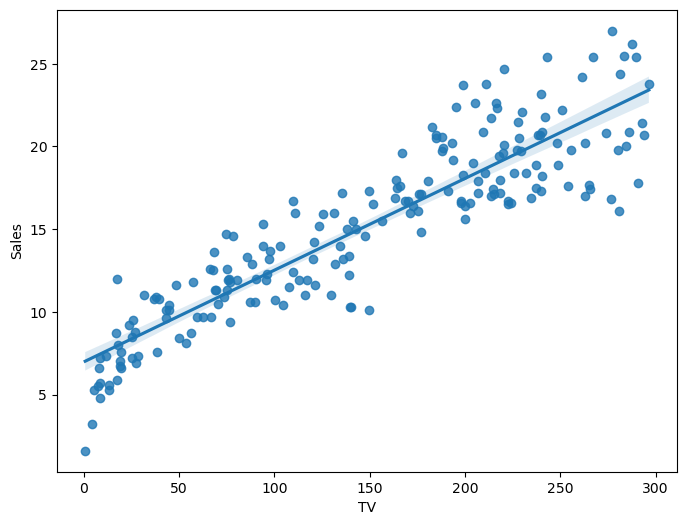

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "TV", 
            y = "Sales", 
            data = df)
plt.show()

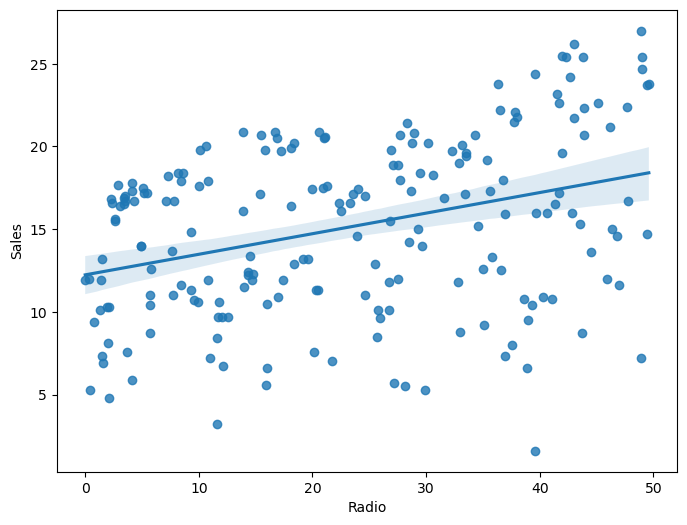

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "Radio", 
            y = "Sales", 
            data = df)
plt.show()

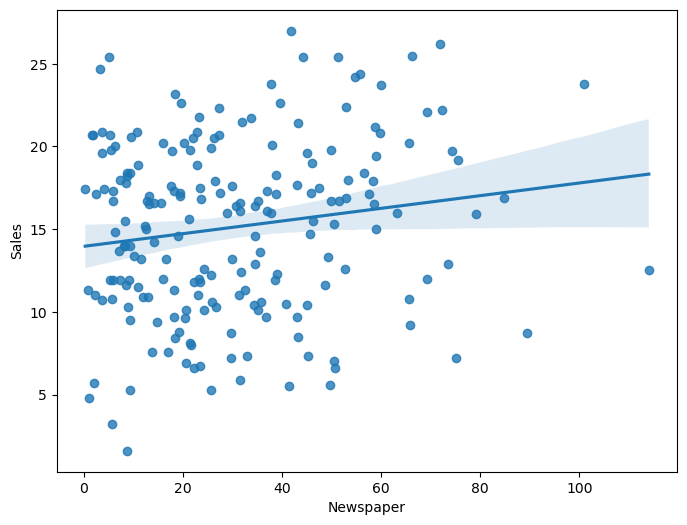

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "Newspaper", 
            y = "Sales", 
            data = df)
plt.show()

In [18]:
sales = df['Sales']

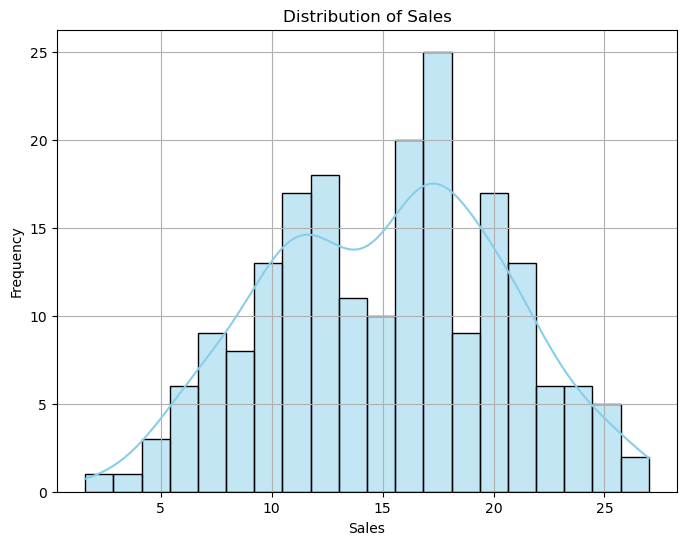

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(sales, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()